# Simple Linear Regression



# Reading the files and checking the data format

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('/content/drive/MyDrive/LearningML/MyPractice/SimpleLinearRegressin_Practice/weatherHistory.csv')
dataset.head(10)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
5,2006-04-01 05:00:00.000 +0200,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66,Partly cloudy throughout the day.
6,2006-04-01 06:00:00.000 +0200,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,Partly cloudy throughout the day.
7,2006-04-01 07:00:00.000 +0200,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,Partly cloudy throughout the day.
8,2006-04-01 08:00:00.000 +0200,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259.0,9.9820,0.0,1017.37,Partly cloudy throughout the day.
9,2006-04-01 09:00:00.000 +0200,Partly Cloudy,rain,13.772222,13.772222,0.72,12.5258,279.0,9.9820,0.0,1017.22,Partly cloudy throughout the day.


# Pick 2 independent variable and 1 dependent variable

In [27]:
App_Temp = dataset.iloc[:, 4].values

In [28]:
print(App_Temp)

[ 7.38888889  7.22777778  9.37777778 ... 22.03888889 21.52222222
 20.43888889]


In [29]:
Humidity = dataset.iloc[:, 5].values

In [30]:
print(Humidity)

[0.89 0.86 0.89 ... 0.56 0.6  0.61]


In [31]:
y = dataset.iloc[:, -1].values

In [40]:
print(y)

['Partly cloudy throughout the day.' 'Partly cloudy throughout the day.'
 'Partly cloudy throughout the day.' ...
 'Partly cloudy starting in the morning.'
 'Partly cloudy starting in the morning.'
 'Partly cloudy starting in the morning.']


# Data Preprocessing



Check for missing values for the **apparent temperature**, **humidity** and the **daily summary**

In [33]:
# Checking apparent temperature
for i in App_Temp:
  if i == 'NaN':
    print('There are missing values')

In [34]:
# Checking humidity 
for i in Humidity:
  if i == 'NaN':
    print('There are missing values')

In [35]:
# Checking daily summary
for i in y:
  if i == 'NaN':
    print('There are missing values')

Need to apply encoding for the daily summary column as the data is not numerical


In [42]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

Need to use the label encoder for the dependent variable

In [61]:
print(y)

[197 197 197 ... 170 170 170]
213


# Apparent Temperature Vs Daily Summary

Split training set, between the apparent temperature and the daily summary

In [44]:
from sklearn.model_selection import train_test_split
app_temp_X_train, app_temp_X_test, y_train, y_test = train_test_split(App_Temp, y, test_size = 0.2, random_state = 1)

Perform **feature scaling**, and use the normalization techinique.
Since unsure if the dataset follows normal distribution

In [56]:
# from sklearn.preprocessing import Normalizer
# nm = Normalizer()
# # print(app_temp_X_train)
# app_temp_X_train = app_temp_X_train.reshape(-1, 1)
# app_temp_X_test = app_temp_X_train.reshape(-1, 1)

# app_temp_X_train = nm.fit_transform(app_temp_X_train)
# app_temp_X_test = nm.transform(app_temp_X_test)

Train the model

In [57]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(app_temp_X_train, y_train)

LinearRegression()

Predict the Test set result

In [58]:
y_pred = regressor.predict(app_temp_X_test)

# Visualize the training set result

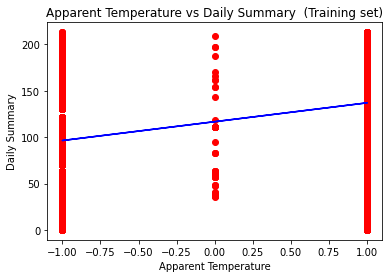

In [59]:
plt.scatter(app_temp_X_train, y_train, color = 'red')
plt.plot(app_temp_X_train, regressor.predict(app_temp_X_train), color = 'blue')
plt.title('Apparent Temperature vs Daily Summary  (Training set)')
plt.xlabel('Apparent Temperature')
plt.ylabel('Daily Summary')
plt.show()